In [1]:
import networkx as nx
import sympy as sy
import numpy as np
from circuit_graph import CircuitGraph
from symbolic_system import SymbolicSystem

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
s = CircuitGraph()
s.addBranch(0, 1, "C1")
s.addBranch(0, 1, "I1")
s.addBranch(1, 2, "Ca")
s.addBranch(1, 2, "Ia1")
s.addBranch(1, 2, "Ia2")
s.addBranch(2, 3, "C2")
s.addBranch(2, 3, "I2")
s.addBranch(3, 0, "L")

In [3]:
print("Superconducting loops")
print(s.sc_loops)
print()
print("Closure branches")
print(s.closure_branches)
print()
print("Component map")
print(s.components_map)
print()
print("All loops")
print(s.loops_map)
print()
print("Loop Adjacency")
print(s.loop_adjacency_map)

Superconducting loops
{0: [(1, 2, 1), (0, 3, 0), (0, 1, 1), (3, 2, 1)], 1: [(1, 2, 1), (2, 1, 2)]}

Closure branches
[(3, 2, 1), (2, 1, 2)]

Component map
{(0, 1, 0): 'C1', (0, 1, 1): 'I1', (0, 3, 0): 'L', (1, 2, 0): 'Ca', (1, 2, 1): 'Ia1', (1, 2, 2): 'Ia2', (2, 3, 0): 'C2', (2, 3, 1): 'I2', (1, 0, 0): 'C1', (1, 0, 1): 'I1', (3, 0, 0): 'L', (2, 1, 0): 'Ca', (2, 1, 1): 'Ia1', (2, 1, 2): 'Ia2', (3, 2, 0): 'C2', (3, 2, 1): 'I2'}

All loops
{0: [(0, 1, 0), (0, 1, 1)], 1: [(1, 2, 0), (1, 2, 1)], 2: [(1, 2, 1), (1, 2, 2)], 3: [(2, 3, 0), (2, 3, 1)], 4: [(1, 2, 0), (2, 3, 0), (0, 3, 0), (0, 1, 0)]}

Loop Adjacency
{(0, 4): [(0, 1, 0)], (1, 2): [(1, 2, 1)], (1, 4): [(1, 2, 0)], (3, 4): [(2, 3, 0)]}


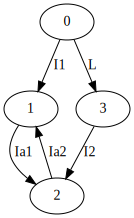

In [4]:
s.drawGraphViz(graph="SCGraph")

In [5]:
sym = SymbolicSystem(s)

In [6]:
sym.node_dofs

{0: (\Phi_{0}, Q_{0}, D_{0}, D^{\dagger}_{0}),
 1: (\Phi_{1}, Q_{1}, D_{1}, D^{\dagger}_{1}),
 2: (\Phi_{2}, Q_{2}, D_{2}, D^{\dagger}_{2}),
 3: (\Phi_{3}, Q_{3}, D_{3}, D^{\dagger}_{3})}

In [7]:
sym.branch_dofs

{(0, 1, 1): (\Phi_{01-1}, Q_{01-1}, D_{01-1}, D^{\dagger}_{01-1}),
 (0, 3, 0): (\Phi_{03-0}, Q_{03-0}, D_{03-0}, D^{\dagger}_{03-0}),
 (1, 2, 1): (\Phi_{12-1}, Q_{12-1}, D_{12-1}, D^{\dagger}_{12-1}),
 (2, 1, 2): (\Phi_{21-2}, Q_{21-2}, D_{21-2}, D^{\dagger}_{21-2}),
 (3, 2, 1): (\Phi_{32-1}, Q_{32-1}, D_{32-1}, D^{\dagger}_{32-1})}

In [8]:
sym.getChargeVector()

Matrix([
[Q_{1}],
[Q_{2}],
[Q_{3}]])

In [10]:
sym.getVoltageVector()

Matrix([
[V_{1}],
[V_{2}],
[V_{3}]])

In [11]:
sym.getCapacitanceMatrix()

Matrix([
[C_{1} + C_{a},        -C_{a},      0],
[       -C_{a}, C_{2} + C_{a}, -C_{2}],
[            0,        -C_{2},  C_{2}]])

In [12]:
sym.getFluxVector()

Matrix([
[\Phi_{1}],
[\Phi_{2}],
[\Phi_{3}]])

In [13]:
sym.Rnb*sym.getFluxVector()

Matrix([
[               -1.0*\Phi_{1}],
[               -1.0*\Phi_{3}],
[ 1.0*\Phi_{1} - 1.0*\Phi_{2}],
[-1.0*\Phi_{1} + 1.0*\Phi_{2}],
[-1.0*\Phi_{2} + 1.0*\Phi_{3}]])

In [14]:
sym.getCurrentVector()

Matrix([
[I_{1}],
[I_{2}],
[I_{3}]])

In [21]:
sym.Rnb*sym.getCurrentVector()

Matrix([
[            -1.0*I_{1}],
[            -1.0*I_{3}],
[ 1.0*I_{1} - 1.0*I_{2}],
[-1.0*I_{1} + 1.0*I_{2}],
[-1.0*I_{2} + 1.0*I_{3}]])

In [15]:
sym.getInductanceMatrix()

Matrix([
[0, 0,        0],
[0, 0,        0],
[0, 0, 1.0*L_{}]])

In [16]:
sym.getQuantumJosephsonEnergies()

Matrix([[-0.5*I_{1}*(1.0*D^{\dagger}_{1} + 1.0*D_{1}) - 0.5*I_{2}*(e^{i\phi_{32-1e}}*D_{3}*D^{\dagger}_{2} + conjugate(e^{i\phi_{32-1e}})*D^{\dagger}_{3}*D_{2}) - 0.5*I_{a1}*(1.0*D^{\dagger}_{1}*D_{2} + 1.0*D_{1}*D^{\dagger}_{2}) - 0.5*I_{a2}*(e^{i\phi_{21-2e}}*D_{2}*D^{\dagger}_{1} + conjugate(e^{i\phi_{21-2e}})*D^{\dagger}_{2}*D_{1})]])

In [17]:
sym.getQuantumHamiltonian()

Matrix([[-0.5*I_{1}*(1.0*D^{\dagger}_{1} + 1.0*D_{1}) - 0.5*I_{2}*(e^{i\phi_{32-1e}}*D_{3}*D^{\dagger}_{2} + conjugate(e^{i\phi_{32-1e}})*D^{\dagger}_{3}*D_{2}) - 0.5*I_{a1}*(1.0*D^{\dagger}_{1}*D_{2} + 1.0*D_{1}*D^{\dagger}_{2}) - 0.5*I_{a2}*(e^{i\phi_{21-2e}}*D_{2}*D^{\dagger}_{1} + conjugate(e^{i\phi_{21-2e}})*D^{\dagger}_{2}*D_{1}) + (0.5*Q_{1}/C_{1} + 0.5*Q_{2}/C_{1} + 0.5*Q_{3}/C_{1})*Q_{1} + (0.5*(1/C_{a} + 1/C_{1})*Q_{3} + 0.5*Q_{1}/C_{1} + 0.5*(C_{1} + C_{a})*Q_{2}/(C_{1}*C_{a}))*Q_{2} + (0.5*(1/C_{a} + 1/C_{2} + 1/C_{1})*Q_{3} + 0.5*Q_{1}/C_{1} + 0.5*(C_{1} + C_{a})*Q_{2}/(C_{1}*C_{a}))*Q_{3} + 0.5*\Phi_{3}**2/L_{}]])

In [37]:
s = CircuitGraph()
s.addBranch(0, 1, "C")
s.addBranch(0, 1, "L")
s.addBranch(0, 1, "I")

In [38]:
print("Superconducting loops")
print(s.sc_loops)
print()
print("Closure branches")
print(s.closure_branches)
print()
print("Component map")
print(s.components_map)
print()
print("All loops")
print(s.loops_map)
print()
print("Loop Adjacency")
print(s.loop_adjacency_map)

Superconducting loops
{0: [(0, 1, 1), (1, 0, 2)]}

Closure branches
[(1, 0, 2)]

Component map
{(0, 1, 0): 'C', (0, 1, 1): 'L', (0, 1, 2): 'I', (1, 0, 0): 'C', (1, 0, 1): 'L', (1, 0, 2): 'I'}

All loops
{0: [(0, 1, 0), (0, 1, 1)], 1: [(0, 1, 1), (0, 1, 2)]}

Loop Adjacency
{(0, 1): [(0, 1, 1)]}


In [39]:
sym = SymbolicSystem(s)

In [40]:
sym.node_dofs

{0: (\Phi_{0}, Q_{0}, D_{0}, D^{\dagger}_{0}),
 1: (\Phi_{1}, Q_{1}, D_{1}, D^{\dagger}_{1})}

In [41]:
sym.branch_dofs

{(0, 1, 1): (\Phi_{01-1}, Q_{01-1}, D_{01-1}, D^{\dagger}_{01-1}),
 (1, 0, 2): (\Phi_{10-2}, Q_{10-2}, D_{10-2}, D^{\dagger}_{10-2})}

In [42]:
sym.getChargeVector()

Matrix([[Q_{1}]])

In [43]:
sym.getVoltageVector()

Matrix([[V_{1}]])

In [44]:
sym.getCapacitanceMatrix()

Matrix([[C_{}]])

In [45]:
sym.getFluxVector()

Matrix([[\Phi_{1}]])

In [46]:
sym.Rnb*sym.getFluxVector()

Matrix([
[-1.0*\Phi_{1}],
[ 1.0*\Phi_{1}]])

In [47]:
sym.getCurrentVector()

Matrix([[I_{1}]])

In [48]:
sym.Rnb*sym.getCurrentVector()

Matrix([
[-1.0*I_{1}],
[ 1.0*I_{1}]])

In [49]:
sym.getInductanceMatrix()

Matrix([[1.0*L_{}]])

In [50]:
sym.getQuantumJosephsonEnergies()

Matrix([[-0.5*I_{}*(e^{i\phi_{10-2e}}*D_{1} + conjugate(e^{i\phi_{10-2e}})*D^{\dagger}_{1})]])

In [51]:
sym.getQuantumHamiltonian()

Matrix([[-0.5*I_{}*(e^{i\phi_{10-2e}}*D_{1} + conjugate(e^{i\phi_{10-2e}})*D^{\dagger}_{1}) + 0.5*\Phi_{1}**2/L_{} + 0.5*Q_{1}**2/C_{}]])